<center><h1> Regresión Avanzada </h1></center>

<div  align="right">Armando Olivares</div>

- Predict home sales prices using a dataset with more than 20000 houses with 19 features (plus the price)
- The data ﬁle is in HomeSalesData.csv Real data with some NAs, outliers, complex variables, etc. (You could use other data set, with same complexity. But check with me previously!) 
- Develop two different models: 
 - One to explain the main factors affecting the home prices (using the complete data set) 
 - Other to predict the home prices (using different training/testing sets) and associated conﬁdence intervals for the testing set

In [209]:
#Paquetes
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv('HomeSalesData.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [211]:
print(data.shape)

(21613, 21)


Datos:

- **filas:** 21613
- **Columnas:** 20

Estadisticos Basicos Nuestro Dataset:

In [212]:
# display the last 5 rows
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Revisamos los valores de cada Variable Catégorica

In [213]:
names = ['view', 'condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode']
for row in names:
    print("------ "+row+ "-----")
    print (data[row].value_counts())
    print("\n")

------ view-----
0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64


------ condition-----
3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64


------ grade-----
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


------ yr_built-----
2014    559
2006    454
2005    450
2004    433
2003    422
2007    417
1977    417
1978    387
1968    381
2008    367
1967    350
1979    343
1959    334
1990    320
1962    312
2001    305
1954    305
1987    294
1989    290
1969    280
1955    271
1988    270
1999    265
1947    263
1963    256
1976    253
1966    250
1950    250
1994    249
1960    248
       ... 
1909     94
1906     92
1930     90
1919     88
1900     87
1908     86
1923     84
1912     79
1916     79
1921     76
1905     74
1911     73
1937     68
1907     65
1915     64
1931     61
1913     59
1917     56
1914 

Convertimos las variables view y condition a dummies

In [214]:
from sklearn import preprocessing
view = pd.get_dummies(data.loc[:,"view"], prefix="view")
condition = pd.get_dummies(data.loc[:,"condition"], prefix="condition")
condition.head()

,condition_1,condition_2,condition_3,condition_4,condition_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0


In [215]:
data = pd.concat([data, condition, view], axis = 1)
data = data.drop(["view", "condition"], axis=1)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,7,...,0,0,1,0,0,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,6,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,7,...,0,0,0,0,1,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,8,...,0,0,1,0,0,1,0,0,0,0


## Análisis de NA's

In [216]:
print(data.isnull().any().sum(), ' / ', len(data.columns))

print(data.isnull().any(axis=1).sum(), ' / ', len(data))

0  /  29
0  /  21613


In [217]:
data.columns.difference(['date', 'zipcode', 'lat', 'long'])

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'grade', 'id', 'price',
       'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_living15',
       'sqft_lot', 'sqft_lot15', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'waterfront', 'yr_built', 'yr_renovated'],
      dtype='object')

In [218]:
pd.isnull(data).sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
condition_1      0
condition_2      0
condition_3      0
condition_4      0
condition_5      0
view_0           0
view_1           0
view_2           0
view_3           0
view_4           0
dtype: int64

In [219]:
#np.isnan(data)
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
condition_1        uint8
condition_2        uint8
condition_3        uint8
condition_4        uint8
condition_5        uint8
view_0             uint8
view_1             uint8
view_2             uint8
view_3             uint8
view_4             uint8
dtype: object

In [220]:
# check the shape of the DataFrame (rows, columns)
data.shape


(21613, 29)

Que caracteristicas tenemos en nuetro dataset?
- **date**            
- **price   **        
- **bedrooms **         
- **bathrooms    **    
- **sqft_living   **    
- **sqft_lot  **      
- **floors     **     
- **waterfront   **     
- **view       **       
- **condition  **       
- **grade        **     
- **sqft_above     **    
- **sqft_basement    **  
- **yr_built         **
- **yr_renovated      **
- **zipcode            **
- **lat            **
- **long            **
- **sqft_living15     **
- **sqft_lot15     **

Cúal es Nuestra variable respuesta?
- **Precio:** El precio de venta 


## Visualización de los datos

Visualizamos el scatter de cada variable con la variable a predecir


In [221]:
# conventional way to import seaborn
import seaborn as sns

# allow plots to appear within the notebook
#%matplotlib inline

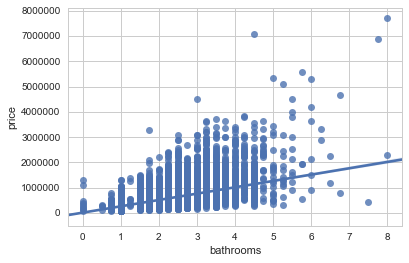

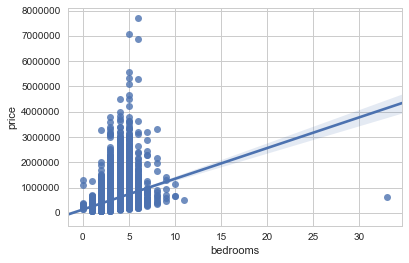

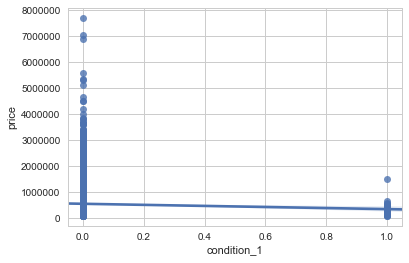

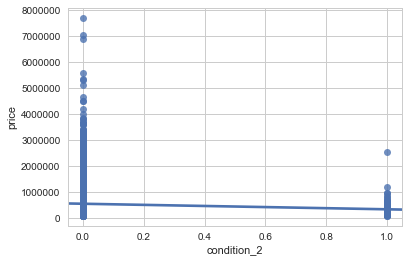

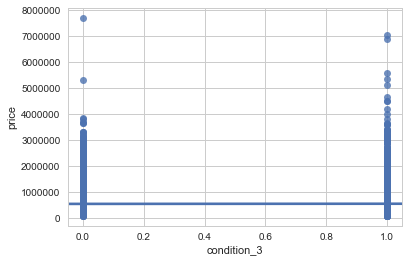

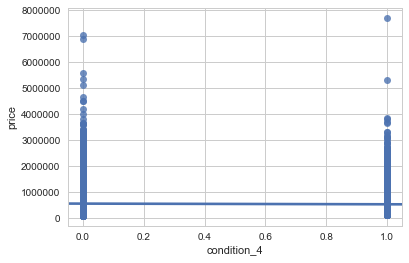

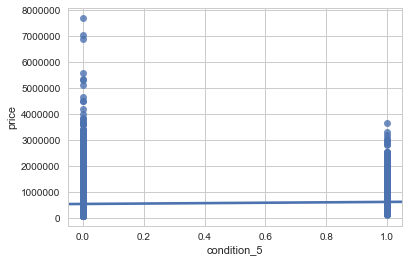

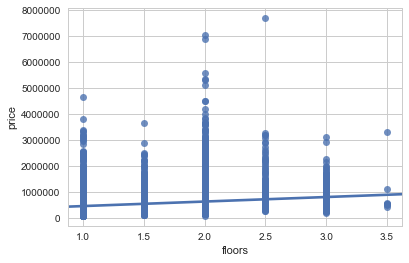

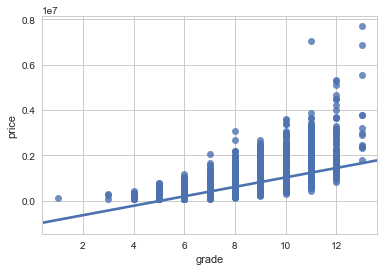

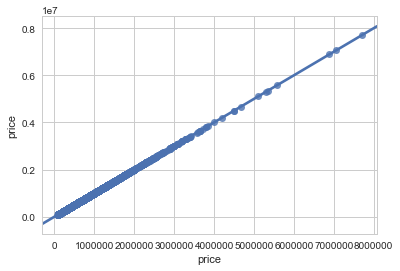

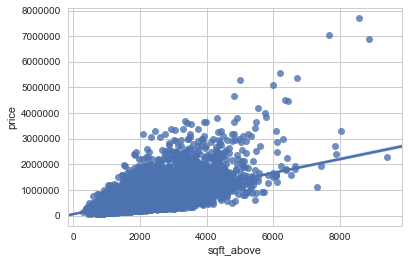

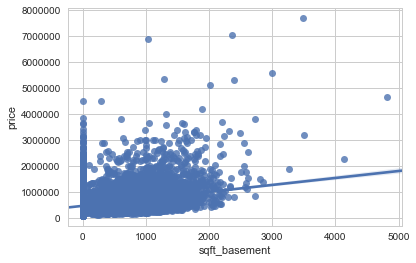

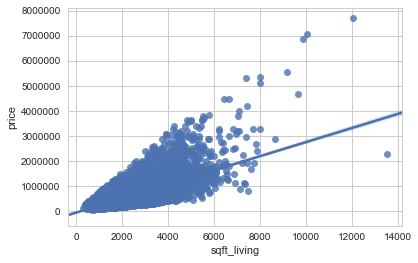

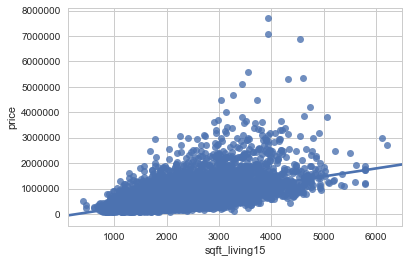

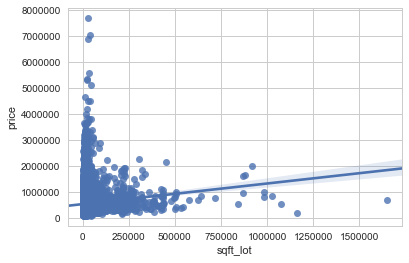

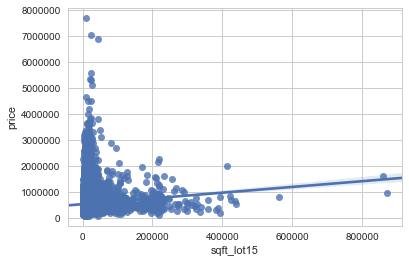

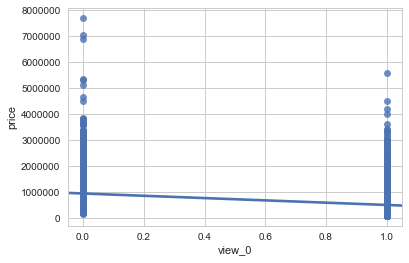

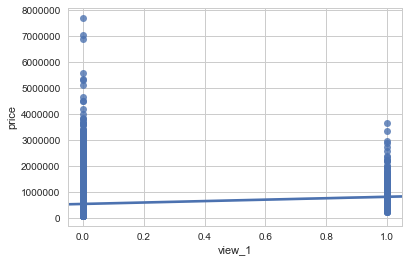

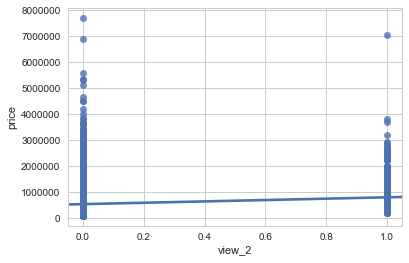

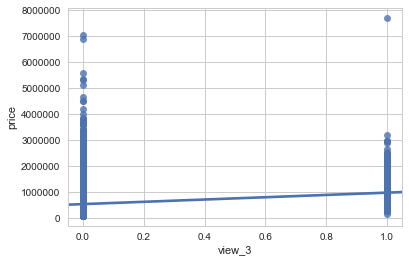

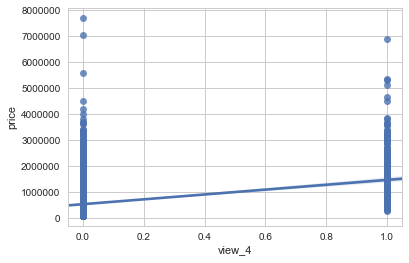

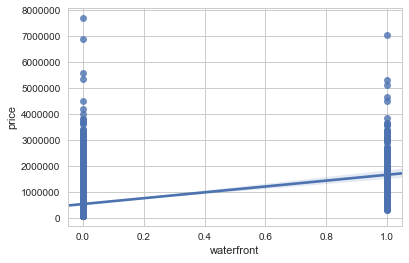

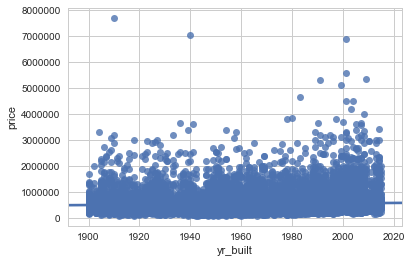

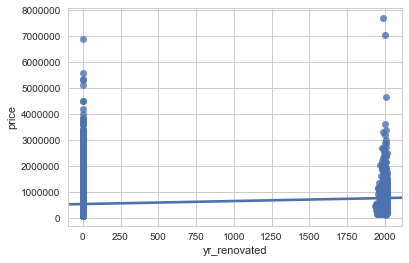

In [222]:
#fig, axes = plt.subplots(ncols=20, nrows= 2)
sns.set_style("whitegrid")
for i, yvar in enumerate(data.columns.difference(['date', 'zipcode', 'lat', 'long', "id"])):
    sns.regplot(x=data[yvar],y=data["price"])
    plt.show()

y la correlación entre las variables

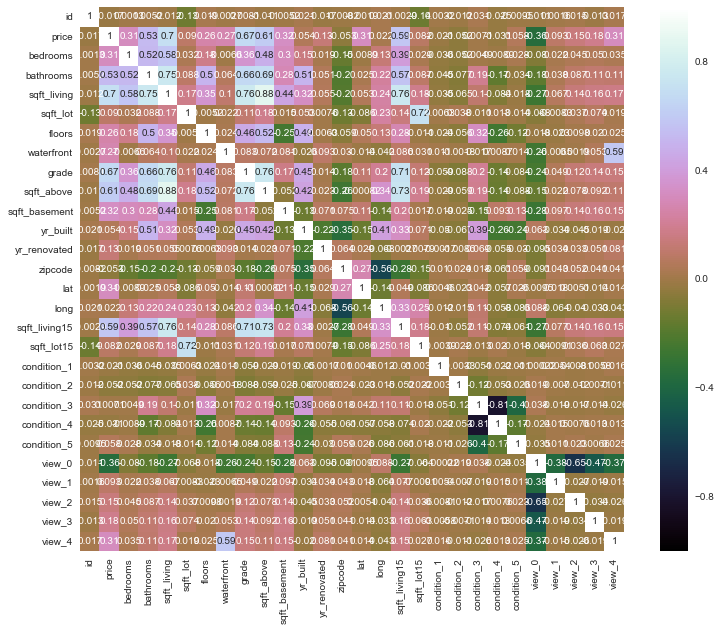

In [223]:
plt.subplots(figsize=(13, 10))
sns.heatmap(data.corr(), square=True,  linecolor='k', annot=True, cmap='cubehelix')

## Regresión Lineal con Todas la Variables

Realizaremos el estudios de regresiones lineales,  la cual tiene la ventaja de ser facilmente entendible, es decir un modelo explicativo

### Forma de la Regresión Lineal

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ variable a predecir
- $\beta_0$ la constante
- $\beta_1$ el coeficiente  de  $x_1$ 
- $\beta_n$ el coeficiente para $x_n$ 



In [224]:
import statsmodels.api as sm
X = data[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
X.shape
y =data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     1739.
Date:                Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                        00:42:08   Log-Likelihood:            -2.2087e+05
No. Observations:               16209   AIC:                         4.418e+05
Df Residuals:                   16188   BIC:                         4.419e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
bathrooms      4595.0595   3546.706      1.296

In [225]:
y_hat = results.predict(X_test)  

r2_score(y_hat, y_test)   

0.42431920990466754

## Dividimos nuestros datos en  training y testing para validación

In [226]:
from sklearn.cross_validation import train_test_split
X = data[data.columns.difference(['date', 'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [227]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16209, 24)
(16209,)
(5404, 24)
(5404,)


## Linear regression in scikit-learn con todas las variables de nuestro set de datos

In [228]:
# import model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

# instantiate
lm = LinearRegression()


In [229]:
lm.fit(X, y)

y_hat = lm.predict(X)  

lm.score(X, y)   


0.67948682119712855

obtenemos un 67% de $ R^2 $


## Realizaremos ahora un análisis más profundo de nustro dataset a fin de estudiar outlier, relaciones entre varibles, etc. a fin de mejorar nuestro modelo 

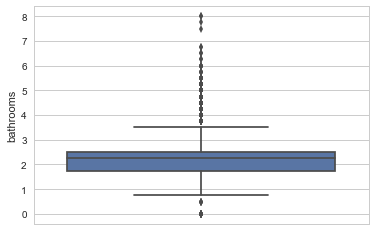

In [230]:
sns.boxplot(y=data.bathrooms)

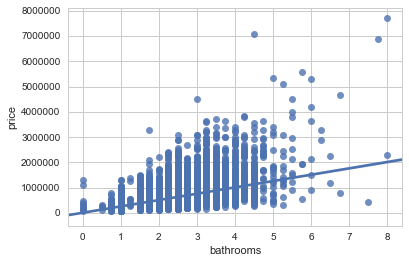

In [231]:
sns.regplot(x=data['bathrooms'],y=data["price"])


In [232]:
data.bathrooms.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [233]:
data[(data.bathrooms>6) & (data.price < 3000000)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
4024,9175600025,20141007T000000,800000.0,7,6.75,7480,41664,2.0,0,11,...,0,0,1,0,0,0,0,1,0,0
8546,424049043,20140811T000000,450000.0,9,7.50,4050,6504,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
12777,1225069038,20140505T000000,2280000.0,7,8.00,13540,307752,3.0,0,12,...,0,0,1,0,0,0,0,0,0,1
14556,2303900035,20140611T000000,2888000.0,5,6.25,8670,64033,2.0,0,13,...,0,0,1,0,0,0,0,0,0,1
20578,424069279,20150328T000000,1180000.0,6,6.50,6260,10955,2.0,0,11,...,0,0,1,0,0,1,0,0,0,0
21506,2524069097,20140509T000000,2238890.0,5,6.50,7270,130017,2.0,0,12,...,0,0,1,0,0,1,0,0,0,0


Del scatter plot notamos que existen 1 punto outlier que esta influyendo en la linea de regressión, representa la casa que fue vendida con 8 baños a un precio de $2.280.000, lo eliminaremos de nuestro dataset y vemos como cambiar la gráfica

In [234]:
#data = data.drop(12777)
data2 = data.drop(data[(data.bathrooms==0) & (data.price < 3000000)].index)

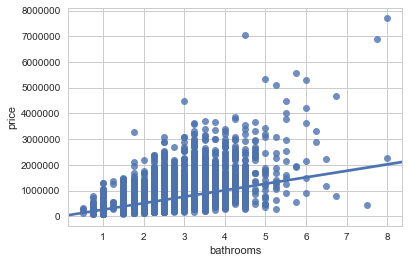

In [235]:
sns.regplot(x=data2['bathrooms'],y=data2["price"])

Outliers para la variable sqlt_above

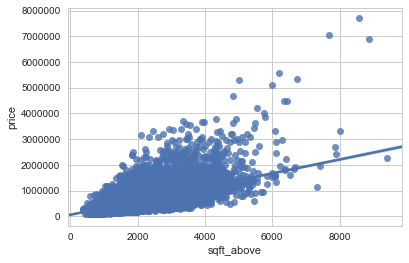

In [236]:
sns.regplot(x=data2['sqft_above'],y=data2["price"])

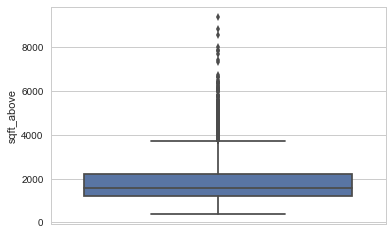

In [237]:
sns.boxplot(y=data2['sqft_above'])

In [238]:
X = data2[data.columns.difference(['date',   'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scores = cross_val_score(lm, X_train, y_train, cv = 5)   
print (scores, np.mean(scores), np.std(scores))

[ 0.68500527  0.67878058  0.65835762  0.66318038  0.66911453] 0.670887675957 0.00980972042124


In [239]:
lm.fit(X_train, y_train)

y_hat = lm.predict(X_test)  

lm.score(X_test, y_test)     

0.69240947626948612

Como se Puede Observar nuestro modelos aún no mejora mucho con respecto a los datos originales

## Apliquemos algunas transformcion a nuestras variables a fin de buscar mejorar nuestro modelo

Revisamos las Distribuciones de la variables:
    

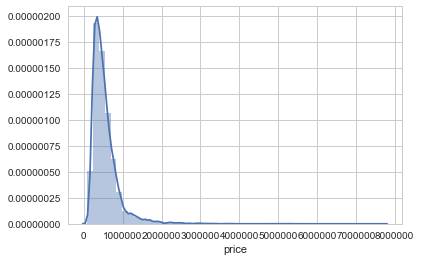

In [240]:
sns.distplot(data2['price'])

Observamos que la distribucion presenta cierta inclinación a la izquierda, lo que nos puede indicar que debemos hacer una transformación logarítmica, para hacercarlas más a una distribución normal

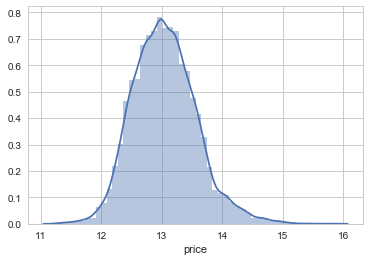

In [241]:
sns.distplot(np.log(data2['price']))

Lo que nos indica que debemos hacer una transformacion logarítmica de la variable a predecir

In [242]:
data2.price = np.log(data2.price)

In [243]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,condition_1,condition_2,condition_3,condition_4,condition_5,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,12.309982,3,1.00,1180,5650,1.0,0,7,...,0,0,1,0,0,1,0,0,0,0
1,6414100192,20141209T000000,13.195614,3,2.25,2570,7242,2.0,0,7,...,0,0,1,0,0,1,0,0,0,0
2,5631500400,20150225T000000,12.100712,2,1.00,770,10000,1.0,0,6,...,0,0,1,0,0,1,0,0,0,0
3,2487200875,20141209T000000,13.311329,4,3.00,1960,5000,1.0,0,7,...,0,0,0,0,1,1,0,0,0,0
4,1954400510,20150218T000000,13.142166,3,2.00,1680,8080,1.0,0,8,...,0,0,1,0,0,1,0,0,0,0


Probamos Nuevamente una regresión lineal con esta transformación

In [244]:
X = data2[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
lm.score(X_test, y_test)   

0.75216493770682635

Nuestro modelo lineal aún mejora significativamente hasta un $ R^2 $ de 74% , seguimos realizando transformaciones:

In [245]:
X = data2[data.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
lm = LinearRegression(normalize=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
lm.score(X_test, y_test) 

0.7521113248753637

In [246]:
data2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4'],
      dtype='object')

Al normalizar los datos no parece haber variación en el rendimiento de nuestro modelo, Observamos que otras variables son susceptibles a la transformación logarítmica:

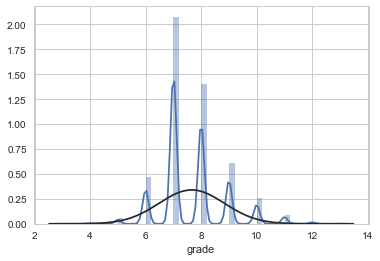

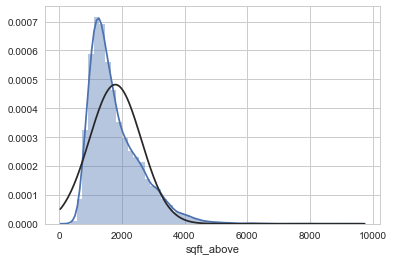

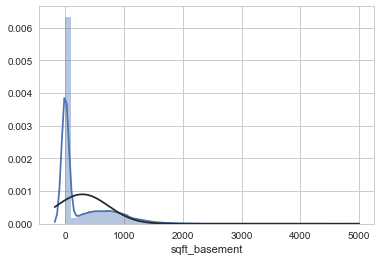

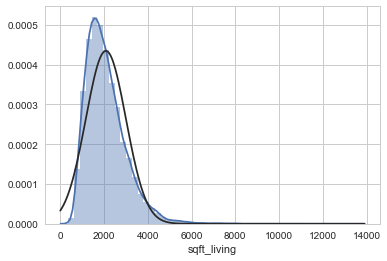

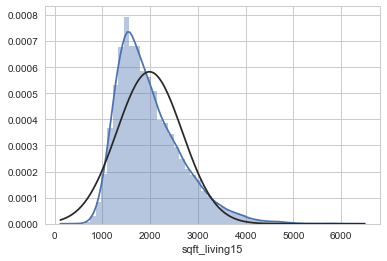

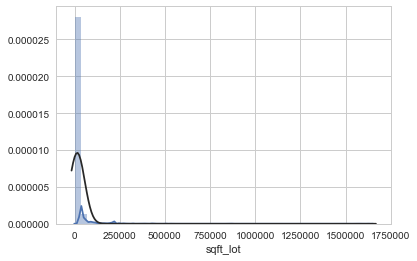

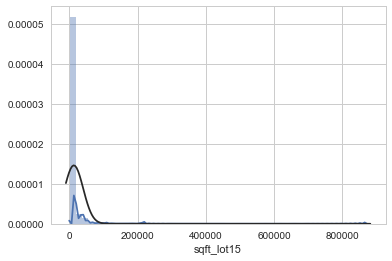

In [247]:
from scipy import stats
for i, yvar in enumerate(data2.columns.difference(['id', 'date', 'price', 'bedrooms', 'bathrooms', 
        'floors', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
        'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'view_0', 'view_1', 'view_2', 'view_3',
       'view_4', 'grade_1', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13'])):
    sns.distplot((data2[yvar]),fit=stats.norm)
    plt.show()

Convertimos a las siguiente variables, sqft_lot15, sqft_lot, sqft_living15, sqft_living, sqft_above

In [248]:
#data.sqft_above[data[data.sqft_above > 0].index] = np.log(data.sqft_above[data[data.sqft_above > 0].index])
data2.sqft_above = np.log(data2.sqft_above)


In [249]:
data2.sqft_living = np.log(data2.sqft_living)

In [250]:
data.sqft_living15 = np.log(data.sqft_living15)

In [251]:
data.sqft_lot = np.log(data.sqft_lot)

In [252]:
data.sqft_lot15 = np.log(data.sqft_lot15)

In [253]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test) 

0.75318937633630134

Probaremos de transformar variables, para ello vamos a incluir las columnas 'yr_built' y 'yr_renovated' y calcularemos el número de años transcurridos hasta hoy

In [254]:
data2['yr_cons'] = data2['date'].apply(lambda x: int(x[:4])) - data2.yr_built
data2['yr_cons'].head()

0    59
1    63
2    82
3    49
4    28
Name: yr_cons, dtype: int64

In [255]:
#data2['date'].apply(lambda x: int(x[:4]))- data2.yr_built

In [256]:
#data2['yr_renova'] = data2['date'].apply(lambda x: int(x[:4])) -data2.yr_renovated.apply(lambda x: data2['date'].apply(lambda x: int(x[:4]))-x if x != 0 else x)


data2['yr_renova'] = (data2['date'].apply(lambda x: int(x[:4])) - data2['yr_renovated'][data2['yr_renovated'] != 0]).fillna(0)
data2['yr_renova'].head()

0     0.0
1    23.0
2     0.0
3     0.0
4     0.0
Name: yr_renova, dtype: float64

In [257]:
data2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5', 'view_0', 'view_1',
       'view_2', 'view_3', 'view_4', 'yr_cons', 'yr_renova'],
      dtype='object')

In [258]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test) 

0.76847245524801344

El modelo no parece mejorar, intentaremos añaidr otra variable por ejemplo el zipcode, el cuál es una variable relacionado con la posición de la casa  que puede ser indicativo del precio.

In [259]:
len(np.unique(data2.zipcode))

70

Tenemos 70 valores categorícos en nuestros datos, debemos agrupar para disminuir la dimensión de los mismos.

In [260]:
zipcode = data2.groupby('zipcode')['price'].mean()

zz= pd.DataFrame(pd.cut(zipcode, bins=[12,13, 14,15 ], labels=[1, 2, 3]))
zz.columns = ["zip_price"]
#zz.loc[98178]
#zz.reset_index()
data3 = data2
zz= pd.get_dummies(zz)
data2 = data3.merge(zz.reset_index(), on=['zipcode', 'zipcode'])
#zz.reset_index
#df.merge(dfGroup.reset_index(), on=['datetime', 'key'])
data2.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,view_0,view_1,view_2,view_3,view_4,yr_cons,yr_renova,zip_price_1,zip_price_2,zip_price_3
21598,2525049086,20141003T000000,14.816142,4,3.25,8.291547,18115,2.0,0,11,...,1,0,0,0,0,25,0.0,0,0,1
21599,2525049113,20140725T000000,14.483340,4,3.50,8.310169,18713,2.0,0,10,...,1,0,0,0,0,27,0.0,0,0,1
21600,3262300485,20150421T000000,14.626441,5,5.25,8.134468,8118,2.0,0,11,...,1,0,0,0,0,9,0.0,0,0,1
21601,6447300365,20141113T000000,14.880221,5,4.00,8.554489,14600,2.0,0,11,...,0,1,0,0,0,1,0.0,0,0,1
21602,3262300818,20150227T000000,14.438772,4,3.75,8.240121,8797,2.0,0,11,...,1,0,0,0,0,9,0.0,0,0,1


Con esta tranformación observamos que nuestro modelo sube hasta obtener un $ R^2 $ de 84%

In [261]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.84052650939792062

In [262]:
r2_score(np.exp(y_hat), np.exp(y_test))

0.78370279106275742

Realizaremos una regresión polinomica de segundo orden  ver si podemos mejorar nuestro modelo

In [263]:
from sklearn.preprocessing import PolynomialFeatures
lm.pol = PolynomialFeatures(2)
X_pol = lm.pol.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pol, y, test_size=0.2)

lm = LinearRegression()
lm.fit(X_train, y_train)
lm.score(X_test, y_test)

-1.2571835647276162

In [264]:
y_hat = lm.predict(X_test)
r2_score(np.exp(y_hat), np.exp(y_test))

0.82465633007709127

aunque el modelo mejora un poco, decidimos no utilizarla ya que la complejidad que agrega al modelo es mayor de lo que mejorar al mismo.

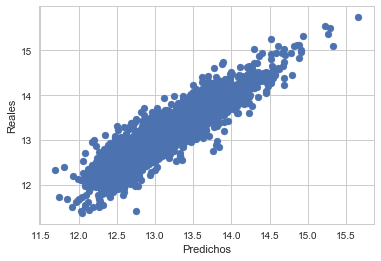

In [304]:
plt.scatter(lm.predict(X_test), y_test)
plt.xlabel("Predichos")
plt.ylabel("Reales")

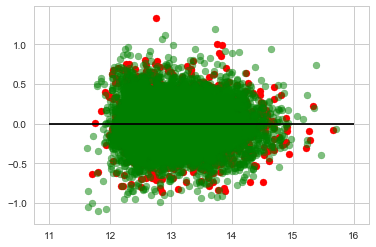

In [305]:
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='r')
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='g',alpha=0.5)
plt.hlines(y= 0, xmin=11, xmax=16)

Los residuos y las predicciones parecen que nuestro modelo lineal está capturando la mayor informacion, los residuos se obseran aleatoriamente distribuidos y las predicciones siguen a los valores reales, por lo que para mejorar nuestro las redicciones se deben explorar modelos más avanzados 

Probemos a estandarizar todo nuestro datos entre cero y uno a fin de evitar mayor influencia de una variable

In [267]:
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,view_0,view_1,view_2,view_3,view_4,yr_cons,yr_renova,zip_price_1,zip_price_2,zip_price_3
0,7129300520,20141013T000000,12.309982,3,1.00,7.073270,5650,1.0,0,7,...,1,0,0,0,0,59,0.0,1,0,0
1,4060000240,20140623T000000,12.232836,2,1.00,6.779922,6780,1.0,0,6,...,1,0,0,0,0,69,0.0,1,0,0
2,4058801670,20140717T000000,13.005830,3,2.25,7.649693,8201,1.0,0,8,...,0,0,1,0,0,47,0.0,1,0,0
3,2976800796,20140925T000000,12.371587,3,1.00,7.170120,5898,1.0,0,7,...,1,0,0,0,0,53,0.0,1,0,0
4,6874200960,20150227T000000,12.043554,2,1.00,6.756932,5265,1.0,0,6,...,1,0,0,0,0,84,0.0,1,0,0


Probemos a añadir una variable categorica indicativa de si la casa tiene o no sotano:

In [268]:
data2['sotano'] = data2['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
data2.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,...,view_1,view_2,view_3,view_4,yr_cons,yr_renova,zip_price_1,zip_price_2,zip_price_3,sotano
0,7129300520,20141013T000000,12.309982,3,1.00,7.073270,5650,1.0,0,7,...,0,0,0,0,59,0.0,1,0,0,0
1,4060000240,20140623T000000,12.232836,2,1.00,6.779922,6780,1.0,0,6,...,0,0,0,0,69,0.0,1,0,0,0
2,4058801670,20140717T000000,13.005830,3,2.25,7.649693,8201,1.0,0,8,...,0,1,0,0,47,0.0,1,0,0,1
3,2976800796,20140925T000000,12.371587,3,1.00,7.170120,5898,1.0,0,7,...,0,0,0,0,53,0.0,1,0,0,0
4,6874200960,20150227T000000,12.043554,2,1.00,6.756932,5265,1.0,0,6,...,0,0,0,0,84,0.0,1,0,0,0


In [269]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'sqft_basement'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.84089864902972644

In [270]:
X = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'sqft_basement'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.84089864902972644

Podemos crear una nueva variable llamada que agregue el area total de la casa

In [271]:
data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode', 'sqft_basement'])].columns

Index(['bathrooms', 'bedrooms', 'condition_1', 'condition_2', 'condition_3',
       'condition_4', 'condition_5', 'floors', 'grade', 'lat', 'long',
       'sotano', 'sqft_above', 'sqft_living', 'sqft_living15', 'sqft_lot',
       'sqft_lot15', 'view_0', 'view_1', 'view_2', 'view_3', 'view_4',
       'waterfront', 'yr_cons', 'yr_renova', 'zip_price_1', 'zip_price_2',
       'zip_price_3'],
      dtype='object')

In [272]:
from  sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
data3 = data2[data2.columns.difference(['date' ,'price', 'yr_built', 'yr_renovated', 'id', 'zipcode'])].copy()
data3=  pd.DataFrame(scaler.fit_transform(data3))
data3.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,0.066667,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.571498,...,0.0,0.0,0.0,0.0,0.0,0.517241,0.012346,1.0,0.0,0.0
1,0.066667,0.060606,0.0,0.0,0.0,1.0,0.0,0.0,0.3,0.554930,...,0.0,0.0,0.0,0.0,0.0,0.603448,0.012346,1.0,0.0,0.0
2,0.233333,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.5,0.568120,...,0.0,1.0,0.0,0.0,0.0,0.413793,0.012346,1.0,0.0,0.0
3,0.066667,0.090909,0.0,0.0,1.0,0.0,0.0,0.0,0.4,0.562007,...,0.0,0.0,0.0,0.0,0.0,0.465517,0.012346,1.0,0.0,0.0
4,0.066667,0.060606,0.0,0.0,1.0,0.0,0.0,0.0,0.3,0.561203,...,0.0,0.0,0.0,0.0,0.0,0.732759,0.012346,1.0,0.0,0.0


In [301]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)
lm.score(X_test, y_test) 

0.84115292659513741

In [303]:
def take2(elem):
    return abs(elem[1])

sorted(list(zip(X_test.columns, lm.coef_)), key=take2, reverse=True)

[('lat', 0.77894252866427627),
 ('zip_price_3', 0.43873459972753898),
 ('waterfront', 0.43513694756774696),
 ('zip_price_1', -0.36735263635393861),
 ('condition_1', -0.25002774110438813),
 ('sqft_above', 0.21025485558207119),
 ('sqft_living', 0.1716751132600482),
 ('condition_5', 0.16813147120097177),
 ('long', -0.14716038525512842),
 ('view_0', -0.14075137955156683),
 ('grade', 0.12268172050973894),
 ('view_4', 0.11894378783526599),
 ('condition_4', 0.08875678639944426),
 ('zip_price_2', -0.071381963373598131),
 ('condition_2', -0.065057160760703156),
 ('condition_3', 0.058196644258503911),
 ('sotano', 0.056790203486445943),
 ('bathrooms', 0.053320947828380739),
 ('view_3', 0.051250446580476249),
 ('floors', 0.037006247735128089),
 ('bedrooms', -0.017526346892412233),
 ('view_1', -0.015454219667486327),
 ('view_2', -0.013988635196687598),
 ('yr_cons', 0.0027753498905557974),
 ('yr_renova', -0.00070927855567602671),
 ('zipcode', 0.00018434681898199523),
 ('sqft_living15', 5.90883512903

Realizaremos una regresión con ridge, a fin de filtrar y/o eliminar variables

In [297]:
ridge = Ridge(fit_intercept=True, alpha=0.5)

ridge.fit(X_train,y_train)
y_hat = ridge.predict(X_test)

In [298]:
r2_score(np.exp(y_hat), np.exp(y_test))

0.78446947942372547

In [299]:
ridge.score(X_test, y_test)

0.84116396160835627

In [277]:
ridge.coef_

array([ 0.39592173, -0.55126089, -0.24633892, -0.06432209,  0.05799256,
        0.08622861,  0.16643984,  0.09847935,  1.22463784,  0.49588013,
       -0.21117482,  0.05833919,  0.67269168,  0.12536289,  0.61994874,
        0.34001129,  0.84621568,  0.01168332, -0.14382707, -0.01537049,
       -0.01454101,  0.05237672,  0.12136186,  0.43181074,  0.32834388,
       -0.05884763, -0.36129021, -0.06848797,  0.42977818])

In [278]:
X_test.columns

RangeIndex(start=0, stop=29, step=1)

In [300]:
def take2(elem):
    return abs(elem[1])

sorted(list(zip(X_test.columns, ridge.coef_)), key=take2, reverse=True)

[('lat', 0.77700723671393102),
 ('zip_price_3', 0.43828565870574776),
 ('waterfront', 0.43261470516497125),
 ('zip_price_1', -0.36724355689091309),
 ('condition_1', -0.24553400462046929),
 ('sqft_above', 0.20991091714023519),
 ('sqft_living', 0.1718148245658517),
 ('condition_5', 0.16687894008338416),
 ('long', -0.14675394803239317),
 ('view_0', -0.14085083404228951),
 ('grade', 0.12275263084221426),
 ('view_4', 0.11946251521282825),
 ('condition_4', 0.087577601743636241),
 ('zip_price_2', -0.071042101817045122),
 ('condition_2', -0.065972891678687626),
 ('condition_3', 0.057050354472125184),
 ('sotano', 0.056725254679386841),
 ('bathrooms', 0.053346520319510565),
 ('view_3', 0.051056948704401368),
 ('floors', 0.037035180641188013),
 ('bedrooms', -0.017515651399898712),
 ('view_1', -0.015544433624577289),
 ('view_2', -0.01412419624968502),
 ('yr_cons', 0.0027772330342944389),
 ('yr_renova', -0.00070633534663202516),
 ('zipcode', 0.00018575013502930804),
 ('sqft_living15', 5.91041502920

seleccionamos las columnas más importantes arrojadas con el Ridge.

In [280]:
col_ridge = [ 'sqft_living','sqft_above' ,'waterfront', 'lat','yr_cons' ]

In [281]:
X = data2[col_ridge]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test) 

0.67343601774137996

In [282]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_hat, y_test))
print(metrics.mean_squared_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat)**2))

0.235930658881
0.0935676299228
0.0935676299228


In [283]:
r2_score(y_hat, y_test)

0.48080330184292464

### Cross Validation de los datos:

In [284]:
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
scores = cross_val_score(lm, X_train, y_train, cv = 5)   
print (scores, np.mean(scores), np.std(scores))

[ 0.83217551  0.83424166  0.83538226  0.8348189   0.82412452] 0.832148568874 0.00415582999959


### Interpretamos los coeficientes de nuestra regresión lineal

In [285]:
print(lm.coef_)

[ 0.66323732  0.21469916  0.75737787  1.557855    0.00215035]


In [286]:
print(lm.intercept_)

-67.7396964277


In [287]:
# 
list(zip(data2.columns.difference(['date',  'lat', 'long', 'price', 'yr_built','yr_renovated' , 'id']), lm.coef_))

[('bathrooms', 0.66323732148399606),
 ('bedrooms', 0.21469915937558617),
 ('condition_1', 0.75737786564645626),
 ('condition_2', 1.5578549950576801),
 ('condition_3', 0.0021503522126895954)]

Las métricas de nuestro modelo lineal

In [288]:
import math
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
lm.fit(X_train, y_train)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test)
y_hat = lm.predict(X_test)  
lm.score(X_test, y_test) 
print(metrics.mean_absolute_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_hat, np.array(y_test))))
print(metrics.mean_squared_error(y_hat, y_test))
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

math.sqrt(np.mean((y_hat - np.array(y_test)) ** 2))

0.161321351436
0.213338030609
0.045513115304
0.213338030609


0.21333803060870743

## Implementamos ahora un Modelo algo más avanzado XGBOOST

In [289]:
import xgboost
from sklearn.model_selection import GridSearchCV
X = data2[data2.columns.difference(['date',  'price', 'yr_built', 'yr_renovated', 'id'])]
X.shape
y =data2['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [290]:
xgb = xgboost.XGBRegressor(n_estimators=2000, learning_rate=0.25, gamma=0, subsample=0.75,colsample_bytree=1, max_depth=4)

In [291]:
xgb.fit(X_train,y_train)
y_hat_xgboost = xgb.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_hat_xgboost)))

0.17395530442


In [292]:
r2_score(np.exp(y_hat_xgboost), np.exp(y_test))

0.89392064292026063

### Implementamos un modelo Random Forest Regressor

In [293]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor( n_estimators=200, n_jobs=2 )
rfr.fit(X_train, y_train)
y_hat = rfr.predict(X_test)
r2_score(np.exp(y_hat), np.exp(y_test))

0.80772140832495554

### Evaluación con modelo de Emsembles AdaBoosting

In [294]:
from sklearn.ensemble import AdaBoostRegressor
booster = AdaBoostRegressor(RandomForestRegressor(), random_state=1,n_estimators=100,learning_rate=0.5)
booster.fit(X_train,y_train) 
r2_score(y_test,booster.predict(X_test))

0.89740348277584103

In [295]:
r2_score(np.exp(y_test),np.exp(booster.predict(X_test)))

0.87565762075381215

### En resumen:


 * La regresión nos permite predecir variables continua a partir de su relación con otras variables.
en el ejemplo se planteo al principio un modelo de regresión lineal explicativo que luego fue evolucionando a medida que se realizaban cambios y/o transformaciones a nuestros datos, hasta llegar a modelos más complejo no lineales pero que introducioan mejoran en el desempeño de nuestra predicción, como XGBOOSt y RandomForest.
 * Es importante destacar que la métrica y la calidad de nuestro modelo será tan bueno como los datos que se hayan utilizado para construirlo, esto quiere decir que lo más importante en un proceso de construcción de un modelo predictivo es: el conocimiento de los datos y el tratamiento que podamos darle para mejorarlos.
 * Por ultimo cabe destacar que siempre se prefiere un modelo sencillo a uno complejo, ¿la razón? un modelo sencillo siempre es más explicativo y más sencillo de mantener.

## Referencias

Sobre Regresión:
- [linear regression on Kaggle](https://www.kaggle.com) 
- [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) and [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) 
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) 

Pandas:

- [Three-part pandas tutorial](http://www.gregreda.com/2013/10/26/intro-to-pandas-data-structures/) 
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) 
(http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) 

Seaborn:

- [Official seaborn tutorial](http://web.stanford.edu/~mwaskom/software/seaborn/tutorial.html)
- [Example gallery](http://web.stanford.edu/~mwaskom/software/seaborn/examples/index.html)